## Preparing and merging the data for classification methods 

- Calculation of RMS and VAR values for each five gestures
- Plotting this values separately 
- Detection of start and end points by averaging and sliding windows method 
- Exportation of a csv file containing  the rms and var values of the significant rows and relevant gesture numbers 


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the CSV file
df1 = pd.read_csv('wave_out_1.csv')
df2 = pd.read_csv('wave_in_1.csv')
df3 = pd.read_csv('fist_1.csv')
df4 = pd.read_csv('fingers_open_1.csv')
df5 = pd.read_csv('rest_1.csv')
raw_df_list = [df1, df2, df3, df4, df5]


In [131]:
#name the columns for ease of access
sensor_columns_list = [None] * 5
for i in range(5):
    sensor_columns_list[i] = raw_df_list[i].columns
    for j in range(8):
         raw_df_list[i].rename(columns = {sensor_columns_list[i][j]:j}, inplace = True)
    

In [132]:
def calculate_variance(window, window_size):
    
    squared_sum = np.sum(np.square(window))  # Sum of squared values
    variance = (1 / window_size) * squared_sum

    return variance

In [133]:
def rmsValue(array):
    n = len(array)
    squre = 0.0
    root = 0.0
    mean = 0.0
    
    #calculating Squre
    for i in range(0, n):
        squre += (array[i] ** 2)
    #Calculating Mean
    mean = (squre/ (float)(n))
    #Calculating Root
    root = math.sqrt(mean)
    return root

In [136]:
rms_row_counts = [None] * 5
initial_values = [None] * 5
indexes = [None] * 5
df_results = [None] * 5

for i in range(5):
    rms_row_counts[i] = (int(len(raw_df_list[i]) / 20) - 1)
    initial_values[i] =  np.arange(start=0,stop= rms_row_counts[i]*17).reshape(rms_row_counts[i],17)
    initial_values[i][initial_values[i] > 0] = 0
    indexes[i] = np.arange(start=0,stop= rms_row_counts[i])
    df_results[i] = pd.DataFrame(initial_values[i], indexes[i], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [ ]:
#calculating RMS and VAR
for raw_df_number in range(5):
    for i in range(8):
        df_sensor = raw_df_list[raw_df_number][i]
        temp_row = []
        
        for j in range(rms_row_counts[raw_df_number]):
            temp_df = df_sensor[(j*20): (j+1)*20]
            temp_df=temp_df.reset_index(drop=True)
            df_results[raw_df_number][i+1].iloc[j] = rmsValue(temp_df)
            df_results[raw_df_number][i+8].iloc[j] = calculate_variance(temp_df, 20)
            df_results[raw_df_number][17].iloc[j] = raw_df_number+1
                        

C:\Users\Dide\AppData\Local\Temp\ipykernel_14196\3401673796.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results[raw_df_number][i+8].iloc[j] = calculate_variance(temp_df, 20)
C:\Users\Dide\AppData\Local\Temp\ipykernel_14196\3401673796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results[raw_df_number][17].iloc[j] = raw_df_number+1
C:\Users\Dide\AppData\Local\Temp\ipykernel_14196\3401673796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

## Extract Gesture Part for Wave Out

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

window_size = 2  # Size of the sliding window
threshold = 30 # Adjust this threshold value as needed

# Step 2: Calculate Averages
df_results[0]['Average'] = df_results[0][3].rolling(window_size).mean() #sensor 3 is significant for this gesture

df_results[0].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
0,4.674398,4.043513,5.324472,4.415880,6.881134,2.664583,3.193744,9.227676,16.35,28.35,19.50,47.35,7.10,10.20,85.15,0,1,NaN
1,5.796551,5.408327,5.458938,3.106445,9.843780,3.640055,3.201562,11.382003,29.25,29.80,9.65,96.90,13.25,10.25,129.55,0,1,5.391705
2,3.612478,4.104875,4.852834,3.464102,5.263079,3.201562,2.387467,7.221496,16.85,23.55,12.00,27.70,10.25,5.70,52.15,0,1,5.155886
3,2.854820,3.293934,3.528456,3.146427,3.398529,3.008322,2.355844,6.016644,10.85,12.45,9.90,11.55,9.05,5.55,36.20,0,1,4.190645
4,2.837252,2.664583,3.728270,3.224903,3.331666,3.500000,2.213594,5.300943,7.10,13.90,10.40,11.10,12.25,4.90,28.10,0,1,3.628363


In [104]:
# Step 3: Detect Start and End Points
start_indices = []
end_indices = []

for i in range(1, len(df_results[0])):
    if df_results[0]['Average'].iloc[i] > threshold and df_results[0]['Average'].iloc[i-1] <= threshold:
        start_indices.append(i)
    elif df_results[0]['Average'].iloc[i] <= threshold and df_results[0]['Average'].iloc[i-1] > threshold:
        end_indices.append(i-1)

print(start_indices)
print(end_indices)

[13, 37, 62, 89, 117, 150, 185, 218, 223, 247, 279]
[16, 42, 68, 92, 121, 153, 188, 221, 223, 252]


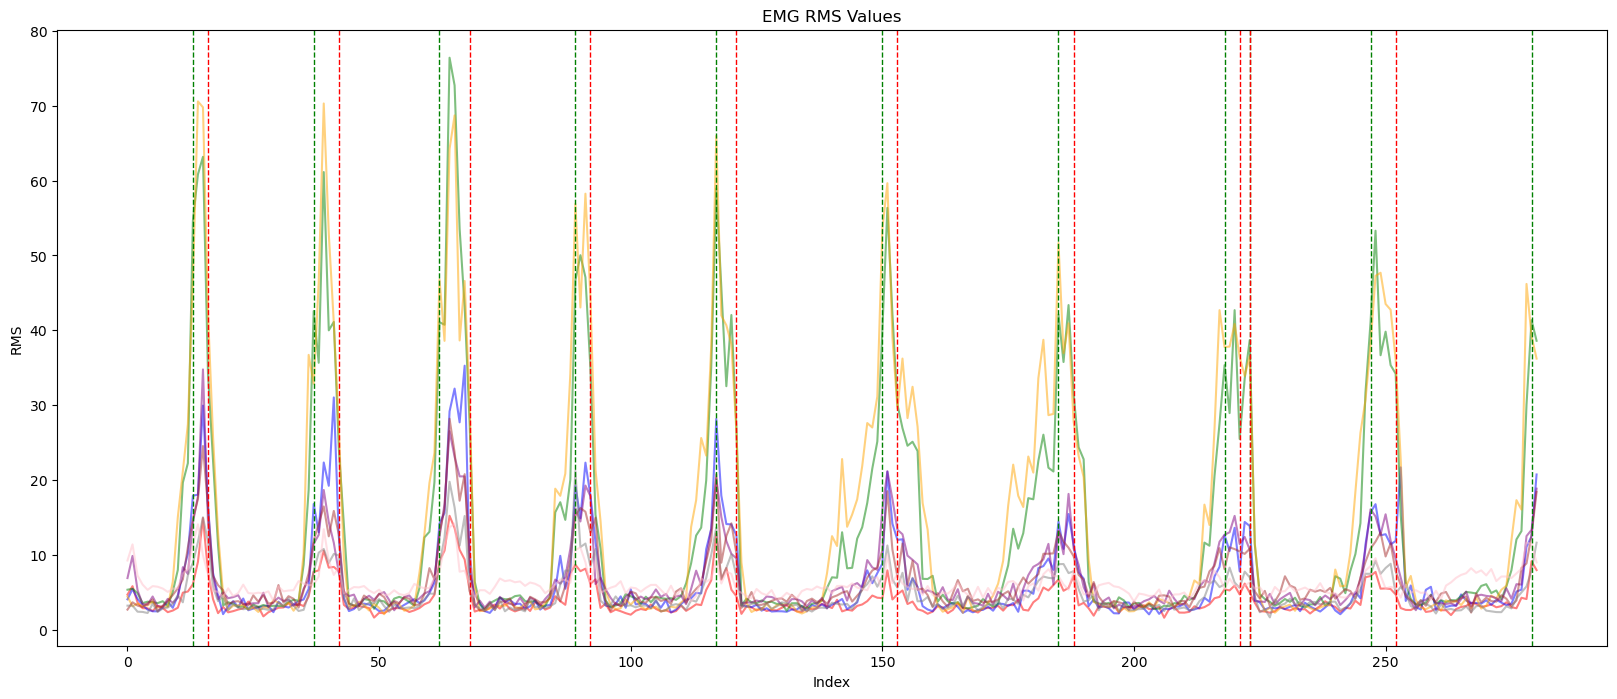

In [105]:
# Plot the RMS values
plt.figure(figsize=(20, 8)) 
time_values = np.arange(rms_row_counts[0])
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']
# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_results[0][i+1], label=legend_names[i], color=colors[i], alpha=0.5)

plt.xlabel('Index')
plt.ylabel('RMS')
plt.title('EMG RMS Values')

# Mark the start and end points on the plot
for start in start_indices:
    plt.axvline(x=start, color='g', linestyle='--', linewidth=1)
for end in end_indices:
    plt.axvline(x=end, color='r', linestyle='--', linewidth=1)

#plt.xlim(0,100)
plt.show()

In [106]:
#make necessery corrections in star end points if necessery
start_indices.remove(223)
start_indices.remove(279)
end_indices.remove(223)

In [107]:
print(start_indices)
print(end_indices)

[13, 37, 62, 89, 117, 150, 185, 218, 247]
[16, 42, 68, 92, 121, 153, 188, 221, 252]


In [108]:
df_result_gesture1 = df_results[0][start_indices[0]:end_indices[0]]
for i in range(1, len(start_indices)):
    df_result_gesture1 = pd.concat([df_result_gesture1, df_results[0][start_indices[i]:end_indices[i]]])

In [109]:
df_result_gesture1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
13,6.053924,17.884351,54.644304,46.631534,14.309088,14.736010,8.913473,11.449891,319.85,2986.00,2174.50,204.75,217.15,79.45,131.10,0,1,38.441392
14,9.052624,18.030530,60.835023,70.586118,17.789042,17.442764,11.694016,14.069470,325.10,3700.90,4982.40,316.45,304.25,136.75,197.95,0,1,57.739664
15,14.903020,29.928248,63.178715,69.796848,34.764206,24.528555,15.006665,9.919677,895.70,3991.55,4871.60,1208.55,601.65,225.20,98.40,0,1,62.006869
37,7.716865,16.783921,42.567593,32.854223,11.482596,11.901681,7.784600,6.004165,281.70,1812.00,1079.40,131.85,141.65,60.60,36.05,0,1,30.614525
38,7.908856,13.003846,35.654593,46.458046,12.660964,14.126217,10.273753,7.095773,169.10,1271.25,2158.35,160.30,199.55,105.55,50.35,0,1,39.111093


## Extract Gesture Part for Wave In

In [110]:
# Assuming your DataFrame is named 'df' with a single column 'RMS'
window_size = 2  # Size of the sliding window
threshold = 18 # Adjust this threshold value as needed

# Step 2: Calculate Averages
df_results[1]['Average'] = df_results[1][8].rolling(window_size).mean() #sensor 8 is significant for this gesture

df_results[1].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
0,4.207137,4.183300,4.381780,4.117038,5.970762,3.577709,2.617250,8.500000,17.50,19.20,16.95,35.65,12.80,6.85,72.25,0,2,NaN
1,6.324555,6.078651,5.128353,4.582576,9.846319,3.943349,2.941088,11.736695,36.95,26.30,21.00,96.95,15.55,8.65,137.75,0,2,10.118347
2,3.542598,5.848077,5.558777,4.347413,7.245688,3.754997,3.114482,9.324698,34.20,30.90,18.90,52.50,14.10,9.70,86.95,0,2,10.530696
3,2.459675,3.741657,3.570714,2.863564,3.807887,3.391165,2.012461,4.888763,14.00,12.75,8.20,14.50,11.50,4.05,23.90,0,2,7.106731
4,2.801785,3.860052,8.046738,15.876083,4.135215,4.669047,3.905125,4.301163,14.90,64.75,252.05,17.10,21.80,15.25,18.50,0,2,4.594963


In [111]:
# Step 3: Detect Start and End Points
start_indices = []
end_indices = []

for i in range(1, len(df_results[1])):
    if df_results[1]['Average'].iloc[i] > threshold and df_results[1]['Average'].iloc[i-1] <= threshold:
        start_indices.append(i)
    elif df_results[1]['Average'].iloc[i] <= threshold and df_results[1]['Average'].iloc[i-1] > threshold:
        end_indices.append(i-1)

print(start_indices)
print(end_indices)

[8, 30, 55, 75, 98, 122, 149, 173, 193, 219, 242, 272]
[12, 32, 55, 79, 104, 126, 152, 173, 201, 222, 246, 274]


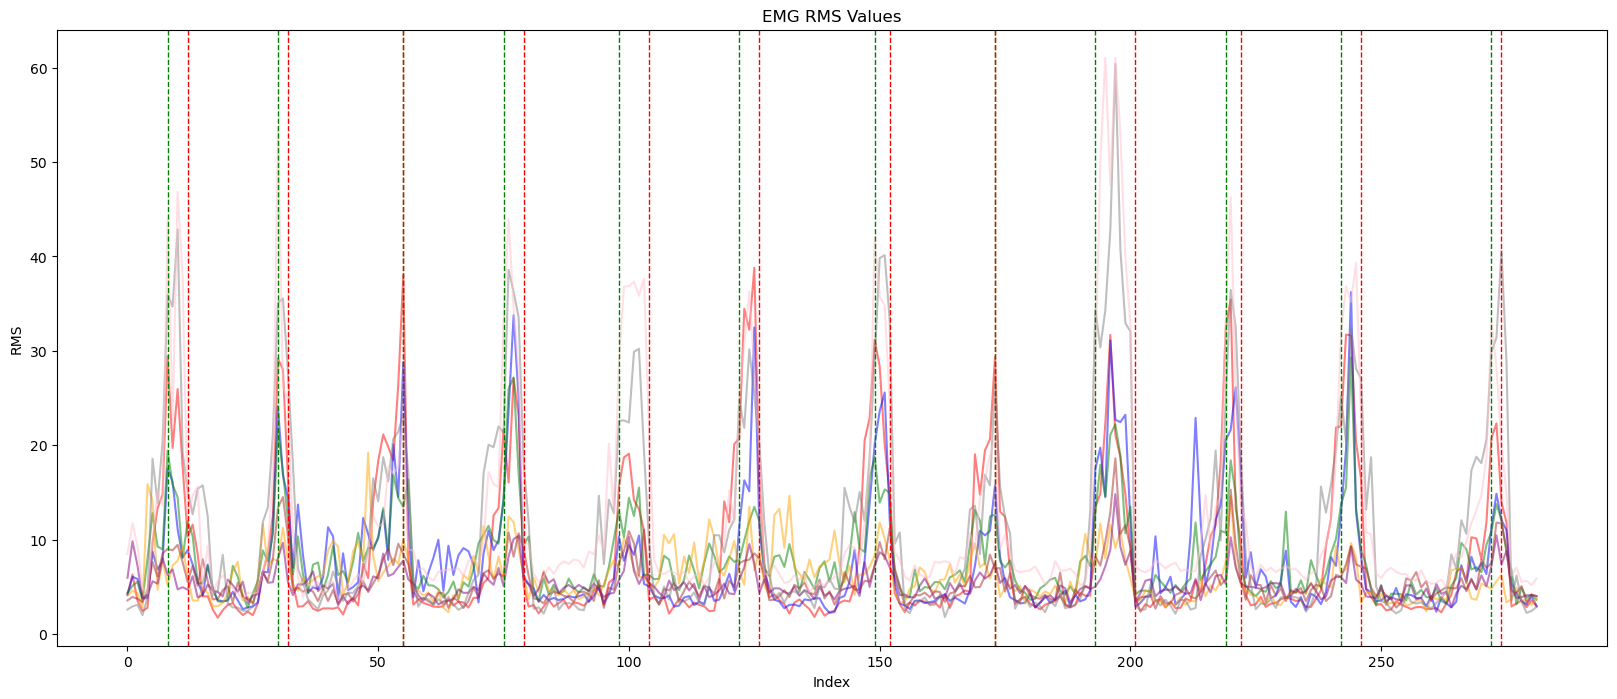

In [112]:
# Plot the RMS values
plt.figure(figsize=(20, 8)) 
time_values = np.arange(rms_row_counts[1])
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']
# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_results[1][i+1], label=legend_names[i], color=colors[i], alpha=0.5)

plt.xlabel('Index')
plt.ylabel('RMS')
plt.title('EMG RMS Values')

# Mark the start and end points on the plot
for start in start_indices:
    plt.axvline(x=start, color='g', linestyle='--', linewidth=1)
for end in end_indices:
    plt.axvline(x=end, color='r', linestyle='--', linewidth=1)

#plt.xlim(17,28)
plt.show()

In [113]:
#make necessery corrections 
start_indices[2] = 53
start_indices[7] = 171

In [114]:
df_result_gesture2 = df_results[1][start_indices[0]:end_indices[0]]
for i in range(1, len(start_indices)):
    df_result_gesture2 = pd.concat([df_result_gesture2, df_results[1][start_indices[i]:end_indices[i]]])

In [115]:
df_result_gesture2.head()
print(start_indices)
print(end_indices)

[8, 30, 53, 75, 98, 122, 149, 171, 193, 219, 242, 272]
[12, 32, 55, 79, 104, 126, 152, 173, 201, 222, 246, 274]


## Extract Gesture Part for Fist

In [116]:
# Assuming your DataFrame is named 'df' with a single column 'RMS'
window_size = 2  # Size of the sliding window
threshold = 40 # Adjust this threshold value as needed

# Step 2: Calculate Averages
df_results[2]['Average'] = df_results[2][2].rolling(window_size).mean() #sensor 2 is significant for this gesture

df_results[2].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
0,4.189272,4.165333,5.138093,4.609772,8.963816,4.984977,4.330127,10.807405,17.35,26.40,21.25,80.35,24.85,18.75,116.80,0,3,NaN
1,4.626013,5.408327,7.221496,4.857983,10.658330,4.024922,3.024897,14.044572,29.25,52.15,23.60,113.60,16.20,9.15,197.25,0,3,4.786830
2,3.640055,3.949684,5.860887,2.645751,7.453187,3.981206,3.146427,9.581232,15.60,34.35,7.00,55.55,15.85,9.90,91.80,0,3,4.679005
3,3.106445,3.563706,5.440588,4.037326,3.721559,3.090307,2.924038,5.899152,12.70,29.60,16.30,13.85,9.55,8.55,34.80,0,3,3.756695
4,3.146427,3.185906,4.171331,3.449638,2.846050,3.885872,2.418677,7.283543,10.15,17.40,11.90,8.10,15.10,5.85,53.05,0,3,3.374806


In [117]:
# Step 3: Detect Start and End Points
start_indices = []
end_indices = []

for i in range(1, len(df_results[2])):
    if df_results[2]['Average'].iloc[i] > threshold and df_results[2]['Average'].iloc[i-1] <= threshold:
        start_indices.append(i)
    elif df_results[2]['Average'].iloc[i] <= threshold and df_results[2]['Average'].iloc[i-1] > threshold:
        end_indices.append(i-1)

print(start_indices)
print(end_indices)

[20, 44, 65, 87, 108, 131, 152, 173, 193, 214, 234, 256, 277]
[24, 46, 66, 88, 110, 132, 154, 174, 195, 216, 235, 257, 279]


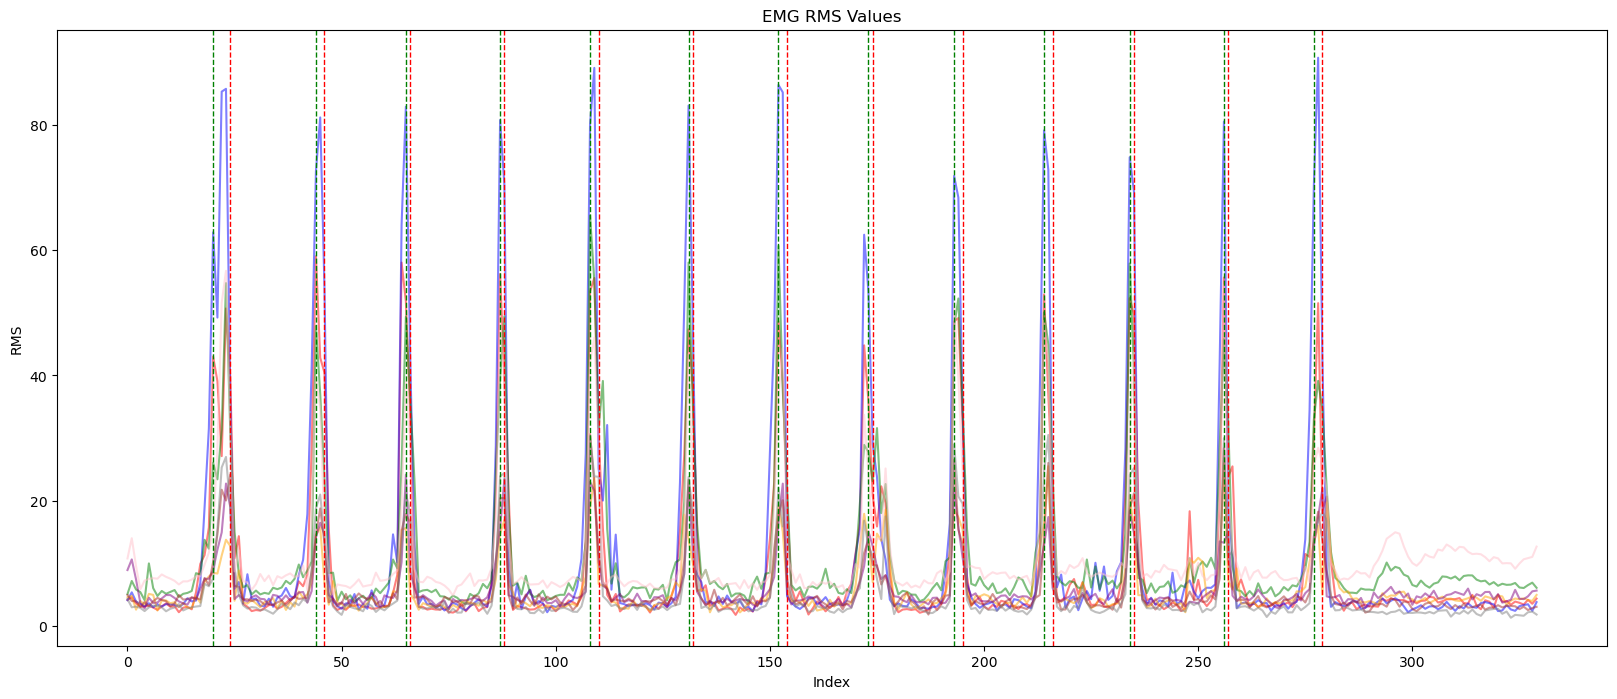

In [118]:
# Plot the RMS values
plt.figure(figsize=(20, 8)) 
time_values = np.arange(rms_row_counts[2])
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']
# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_results[2][i+1], label=legend_names[i], color=colors[i], alpha=0.5)

plt.xlabel('Index')
plt.ylabel('RMS')
plt.title('EMG RMS Values')

# Mark the start and end points on the plot
for start in start_indices:
    plt.axvline(x=start, color='g', linestyle='--', linewidth=1)
for end in end_indices:
    plt.axvline(x=end, color='r', linestyle='--', linewidth=1)

#plt.xlim(17,28)
plt.show()

In [119]:
df_result_gesture3 = df_results[2][start_indices[0]:end_indices[0]]
for i in range(1, len(start_indices)):
    df_result_gesture3 = pd.concat([df_result_gesture3, df_results[2][start_indices[i]:end_indices[i]]])
df_result_gesture3.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
20,43.020925,62.829929,26.078727,8.526429,8.949860,10.295630,7.615773,15.778149,3947.6,680.10,72.70,80.10,106.00,58.00,248.95,0,3,47.180037
21,39.076847,49.230072,23.431816,8.405355,12.206556,14.666288,15.500000,28.358420,2423.6,549.05,70.65,149.00,215.10,240.25,804.20,0,3,56.030001
22,27.133006,85.264881,31.329698,11.280514,14.964959,21.778430,25.328837,51.604263,7270.1,981.55,127.25,223.95,474.30,641.55,2663.00,0,3,67.247477
23,50.687770,85.707643,54.722939,13.798551,22.757416,20.048691,27.000926,56.675833,7345.8,2994.60,190.40,517.90,401.95,729.05,3212.15,0,3,85.486262
44,59.012710,72.565832,47.879536,14.560220,14.170392,14.553350,18.821530,39.857872,5265.8,2292.45,212.00,200.80,211.80,354.25,1588.65,0,3,56.861728


## Extract Gesture Part for Fingers Open

In [120]:
# Assuming your DataFrame is named 'df' with a single column 'RMS'
window_size = 2  # Size of the sliding window
threshold = 20 # Adjust this threshold value as needed

# Step 2: Calculate Averages
df_results[3]['Average'] = df_results[3][4].rolling(window_size).mean() #sensor 4 is significant for this gesture

df_results[3].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
0,4.852834,4.306971,5.417564,3.761649,6.892024,5.084290,3.331666,9.602083,18.55,29.35,14.15,47.50,25.85,11.10,92.20,0,4,NaN
1,6.208865,4.283690,6.848357,3.748333,12.072696,5.138093,2.313007,13.973189,18.35,46.90,14.05,145.75,26.40,5.35,195.25,0,4,3.754991
2,4.748684,4.159327,5.074446,4.207137,5.639149,4.055860,2.701851,8.930286,17.30,25.75,17.70,31.80,16.45,7.30,79.75,0,4,3.977735
3,2.863564,2.846050,4.477723,2.559297,3.456877,3.570714,2.073644,6.328507,8.10,20.05,6.55,11.95,12.75,4.30,40.05,0,4,3.383217
4,2.958040,3.201562,3.500000,3.892300,3.714835,3.271085,3.201562,5.761944,10.25,12.25,15.15,13.80,10.70,10.25,33.20,0,4,3.225798


In [121]:
# Step 3: Detect Start and End Points
start_indices = []
end_indices = []

for i in range(1, len(df_results[3])):
    if df_results[3]['Average'].iloc[i] > threshold and df_results[3]['Average'].iloc[i-1] <= threshold:
        start_indices.append(i)
    elif df_results[3]['Average'].iloc[i] <= threshold and df_results[3]['Average'].iloc[i-1] > threshold:
        end_indices.append(i-1)

print(start_indices)
print(end_indices)

[17, 36, 60, 80, 102, 124, 147, 171, 194, 220]
[19, 37, 62, 82, 105, 128, 150, 173, 196, 223]


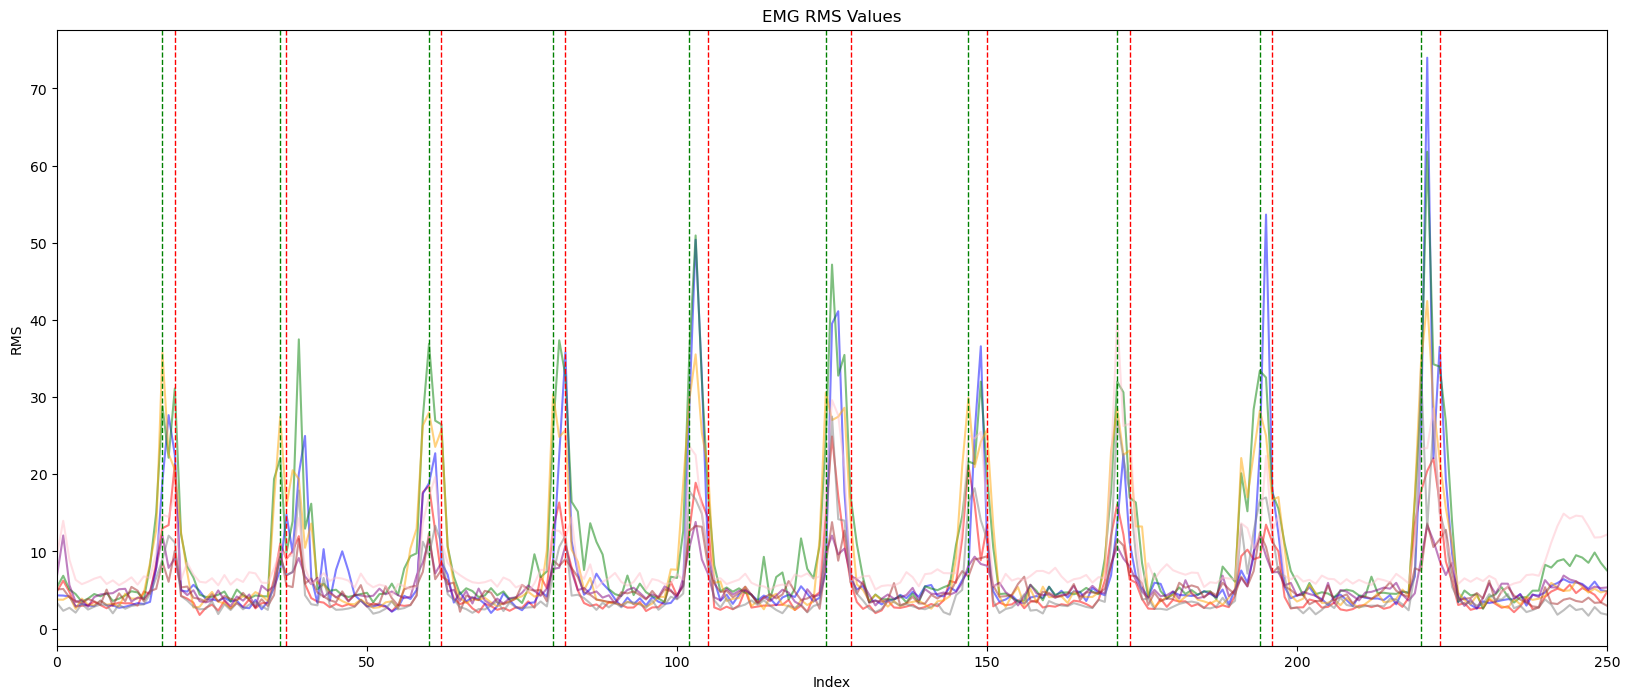

In [122]:
# Plot the RMS values
plt.figure(figsize=(20, 8)) 
time_values = np.arange(rms_row_counts[3])
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']
# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_results[3][i+1], label=legend_names[i], color=colors[i], alpha=0.5)

plt.xlabel('Index')
plt.ylabel('RMS')
plt.title('EMG RMS Values')

# Mark the start and end points on the plot
for start in start_indices:
    plt.axvline(x=start, color='g', linestyle='--', linewidth=1)
for end in end_indices:
    plt.axvline(x=end, color='r', linestyle='--', linewidth=1)

plt.xlim(0,250)
plt.show()

In [123]:
df_result_gesture4 = df_results[3][start_indices[0]:end_indices[0]]
for i in range(1, len(start_indices)):
    df_result_gesture4 = pd.concat([df_result_gesture4, df_results[3][start_indices[i]:end_indices[i]]])
df_result_gesture4.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
17,13.007690,19.094502,28.833141,35.748427,12.049896,8.651589,8.958236,14.761436,364.60,831.35,1277.95,145.20,74.85,80.25,217.90,0,4,24.266592
18,13.418271,27.662249,22.142719,22.661642,7.870832,6.070420,12.047821,14.489651,765.20,490.30,513.55,61.95,36.85,145.15,209.95,0,4,29.205034
36,11.043097,7.645260,22.102036,27.448133,9.343447,10.109402,9.126883,10.195587,58.45,488.50,753.40,87.30,102.20,83.30,103.95,0,4,21.958901
60,18.514859,18.852056,36.893766,28.008927,11.575837,12.365274,9.507891,17.112861,355.40,1361.15,784.50,134.00,152.90,90.40,292.85,0,4,27.161686
61,12.674778,22.722236,26.946243,23.547824,7.151923,6.407027,13.326665,19.643065,516.30,726.10,554.50,51.15,41.05,177.60,385.85,0,4,25.778375


In [124]:
result_concat = pd.concat([df_result_gesture1,df_result_gesture2,df_result_gesture3,df_result_gesture4, df_results[4]])

In [125]:
result_concat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Average
13,6.053924,17.884351,54.644304,46.631534,14.309088,14.736010,8.913473,11.449891,319.85,2986.00,2174.50,204.75,217.15,79.45,131.10,0,1,38.441392
14,9.052624,18.030530,60.835023,70.586118,17.789042,17.442764,11.694016,14.069470,325.10,3700.90,4982.40,316.45,304.25,136.75,197.95,0,1,57.739664
15,14.903020,29.928248,63.178715,69.796848,34.764206,24.528555,15.006665,9.919677,895.70,3991.55,4871.60,1208.55,601.65,225.20,98.40,0,1,62.006869
37,7.716865,16.783921,42.567593,32.854223,11.482596,11.901681,7.784600,6.004165,281.70,1812.00,1079.40,131.85,141.65,60.60,36.05,0,1,30.614525
38,7.908856,13.003846,35.654593,46.458046,12.660964,14.126217,10.273753,7.095773,169.10,1271.25,2158.35,160.30,199.55,105.55,50.35,0,1,39.111093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2.024846,2.747726,2.156386,1.936492,3.674235,2.408319,1.936492,2.701851,7.55,4.65,3.75,13.50,5.80,3.75,7.30,0,5,NaN
276,2.655184,3.170173,1.746425,1.183216,2.636285,1.532971,1.884144,3.271085,10.05,3.05,1.40,6.95,2.35,3.55,10.70,0,5,NaN
277,1.843909,3.442383,1.843909,2.202272,2.906888,2.167948,2.073644,2.578759,11.85,3.40,4.85,8.45,4.70,4.30,6.65,0,5,NaN
278,1.897367,2.828427,2.224860,2.000000,3.146427,2.408319,2.049390,2.323790,8.00,4.95,4.00,9.90,5.80,4.20,5.40,0,5,NaN


In [126]:
result_concat.to_csv('merged_gesture_rms_var_1.csv', index=False)